In [1]:
# Import packages
from __future__ import division, print_function # Imports from __future__ since we're running Python 2
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%run '/home/mark/Desktop/Plastic-Parallel-Programming/data_analysis/year 2/utilities.ipynb'

Program parameters:

In [2]:
machine    = "XXXII"
kernel     = "vm"
size       = "small"
randomised = False

In [3]:
if machine == "spa":
    number_of_tests = 144
    num_workers_max = 24
    num_cores_max   = 24
    greater_than_threshold = 12

elif machine == "XXXII":
    number_of_tests = 576
    num_workers_max = 48
    num_cores_max   = 48
    greater_than_threshold = 32
    
if randomised == True:
    folder_path1 = "results/" + machine + "/optimal_threads_" + kernel + "_" + size + "_randomised/"
    graph_path   = "graphs/" + machine + "/optimal_threads_" + kernel + "_" + size + "_randomised.png"
    
else:
    folder_path1 = "results/" + machine + "/optimal_threads_" + kernel + "_" + size + "/"
    graph_path   = "graphs/" + machine + "/optimal_threads_" + kernel + "_" + size + ".png"

In [4]:
file_names = []

for i in range(1, number_of_tests + 1): 
    file_names.append("test" + str(i) + "/output")

In [5]:
data = []
        
fetch_data(folder_path1, file_names, data, ["Runtime"])
        
raw_dataset = []

num_workers_min = 2
num_workers_step = 2
num_workers_values = range(num_workers_min, num_workers_max + num_workers_step, num_workers_step)
nwv_len = len(num_workers_values)
num_workers = num_workers_values[0]

num_cores_min = 2
num_cores_step = 2
num_cores_values = range(num_cores_min, num_cores_max + num_cores_step, num_cores_step)
ncv_len = len(num_cores_values)
num_cores = num_cores_values[0]

greater_than = False

for i in range(len(data)):
    num_workers = num_workers_values[i % nwv_len]
    num_cores = num_cores_values[(i // nwv_len) % ncv_len]
    
    if num_cores > greater_than_threshold:
        greater_than = True
    
    for j in range(1, len(data[i])):
        raw_dataset.append([32, num_cores, num_workers, data[i].values[j][0], greater_than])

raw_dataset = pd.DataFrame(raw_dataset)
raw_dataset.columns = ["Grid Size", "Num Cores", "Num Workers", "Time", "Num Cores Greater Than Physical Cores"]

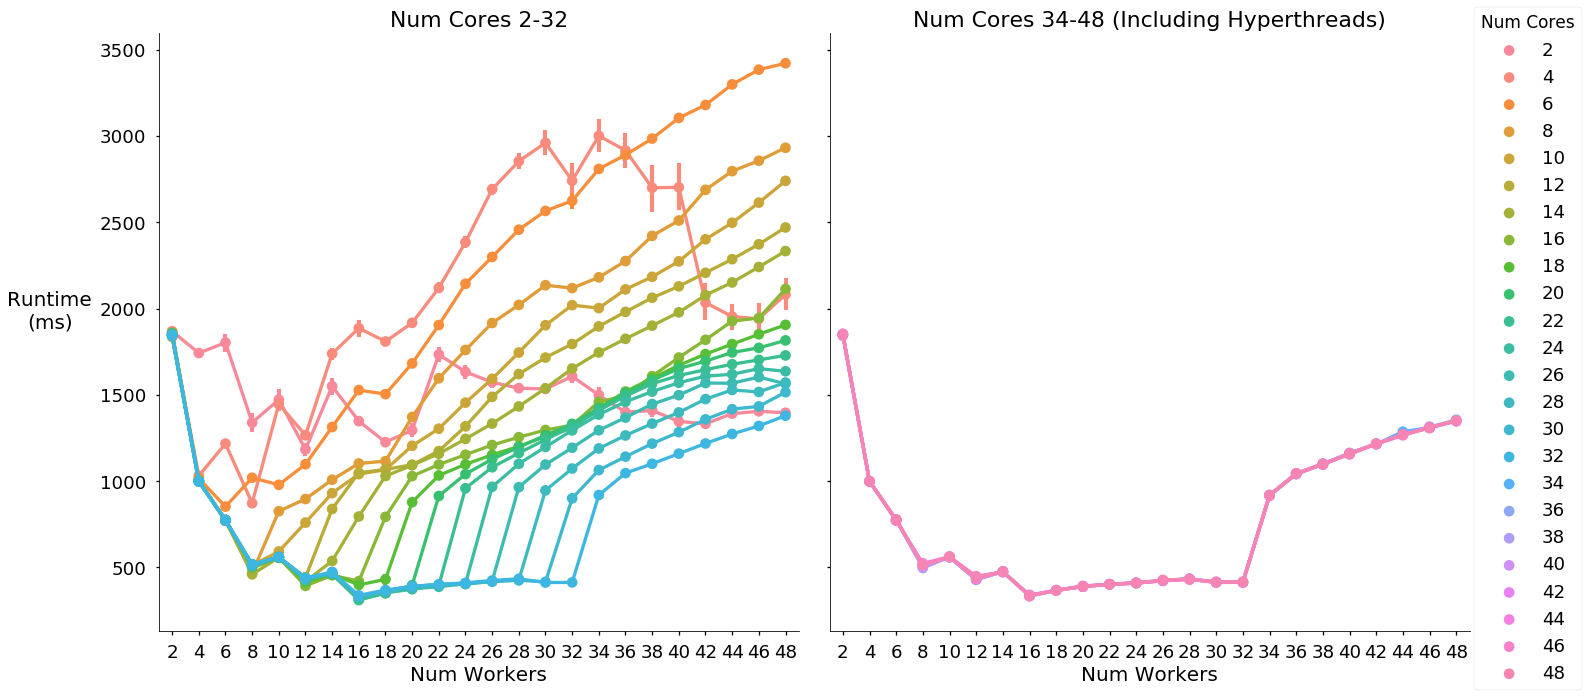

In [6]:
sns.set_context("talk", font_scale=1.4)
ax = sns.factorplot(x="Num Workers", y="Time",
                hue="Num Cores",
                col="Num Cores Greater Than Physical Cores",
                size=10,
                scale=0.8,
                ci=95,
                data=raw_dataset);

axes = ax.axes.flatten()

axes[0].yaxis.labelpad = 50
axes[0].set_ylabel('Runtime\n(ms)', rotation=0)

if machine == "spa":
    axes[0].set_title("Num Cores 2-12")
    axes[1].set_title("Num Cores 14-24 (Including Hyperthreads)")
    
elif machine == "XXXII":
    axes[0].set_title("Num Cores 2-32")
    axes[1].set_title("Num Cores 34-48 (Including Hyperthreads)")

plt.savefig(graph_path)
plt.show()